## Objective
Study the sequence durations of prop. units

In [1]:
# region Set up notebook imports
%load_ext autoreload
%autoreload 2
# Allow for imports of other scripts
import sys
PATH = "/data/MEAprojects/PropSignal"
if PATH not in sys.path:
    sys.path.append(PATH)
# Reload a module after changes have been made
from importlib import reload
# endregion

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

from src import utils
from src.plot import set_dpi
from src.recording import Recording
from src.sorters.prop_signal import PropSignal

In [2]:
set_dpi(200)

In [3]:
recording = Recording(utils.PATH_REC_SI)

/home/mea/anaconda3/envs/allen_inst/lib/python3.7/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.1 is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))
/home/mea/anaconda3/envs/allen_inst/lib/python3.7/site-packages/hdmf/spec/namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.2.5 because version 2.5.0 is already loaded.
  % (ns['name'], ns['version'], self.__namespaces.get(ns['name'])['version']))
/home/mea/anaconda3/envs/allen_inst/lib/python3.7/site-packages/pynwb/ecephys.py:93: UserWarning: ElectricalSeries 'ElectricalSeries': The second dimension of data does not match the length of electrodes. Your data may be transposed.
  "Your data may be transposed." % (self.__class__.__name__, kwargs["name"]))


In [4]:
prop_signal = PropSignal("/data/MEAprojects/dandi/000034/sub-mouse412804/prop_signal/thresh_5_full", recording)

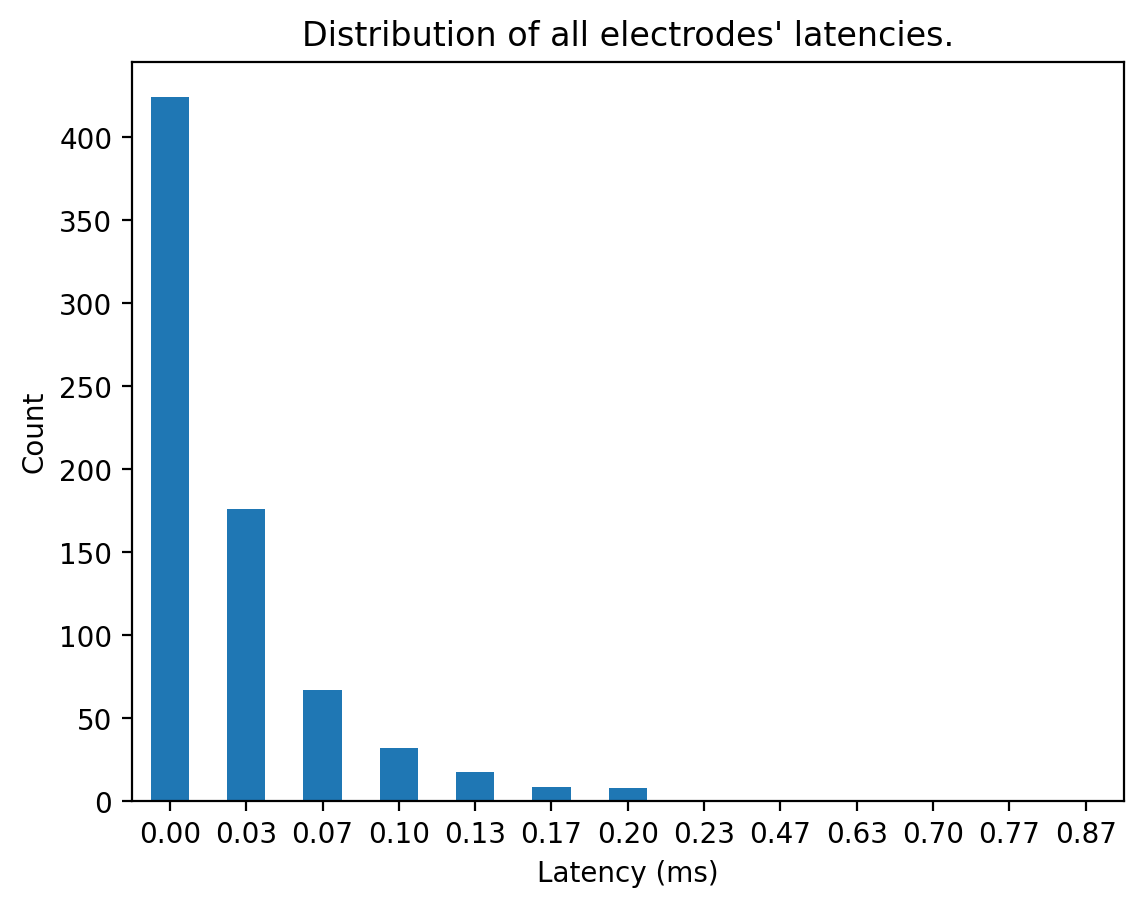

Num. electrodes: 740


In [5]:
# Bar plot of all electrode latencies with first
latencies = {}
for prop_m in prop_signal.props:
    for prop in prop_m:
        for l in prop.latency.values[1:]:
            if l not in latencies:
                latencies[l] = 1
            else:
                latencies[l] += 1

index = sorted(latencies.keys())
data = [latencies[i] for i in index]

df = DataFrame(data=data, index=[f"{dur:.2f}" for dur in index])
df.plot.bar(rot=0, legend=False)
plt.title("Distribution of all electrodes' latencies.")
plt.xlabel("Latency (ms)")
plt.ylabel("Count")
plt.show()
print(f"Num. electrodes: {sum(data)}")

In [6]:
durations = {}
for prop_m in prop_signal.props:
    for prop in prop_m:
        dur = prop_signal.get_sequence_duration(prop)
        dur = round(dur, 2)
        if dur not in durations:
            durations[dur] = 1
        else:
            durations[dur] += 1

In [7]:
print(f"Max duration: {max(durations.keys())}")

Max duration: 0.87


In [8]:
print(f"Num non-zero durations: {sum(c for d,c in durations.items() if d > 0)}")

Num non-zero durations: 144


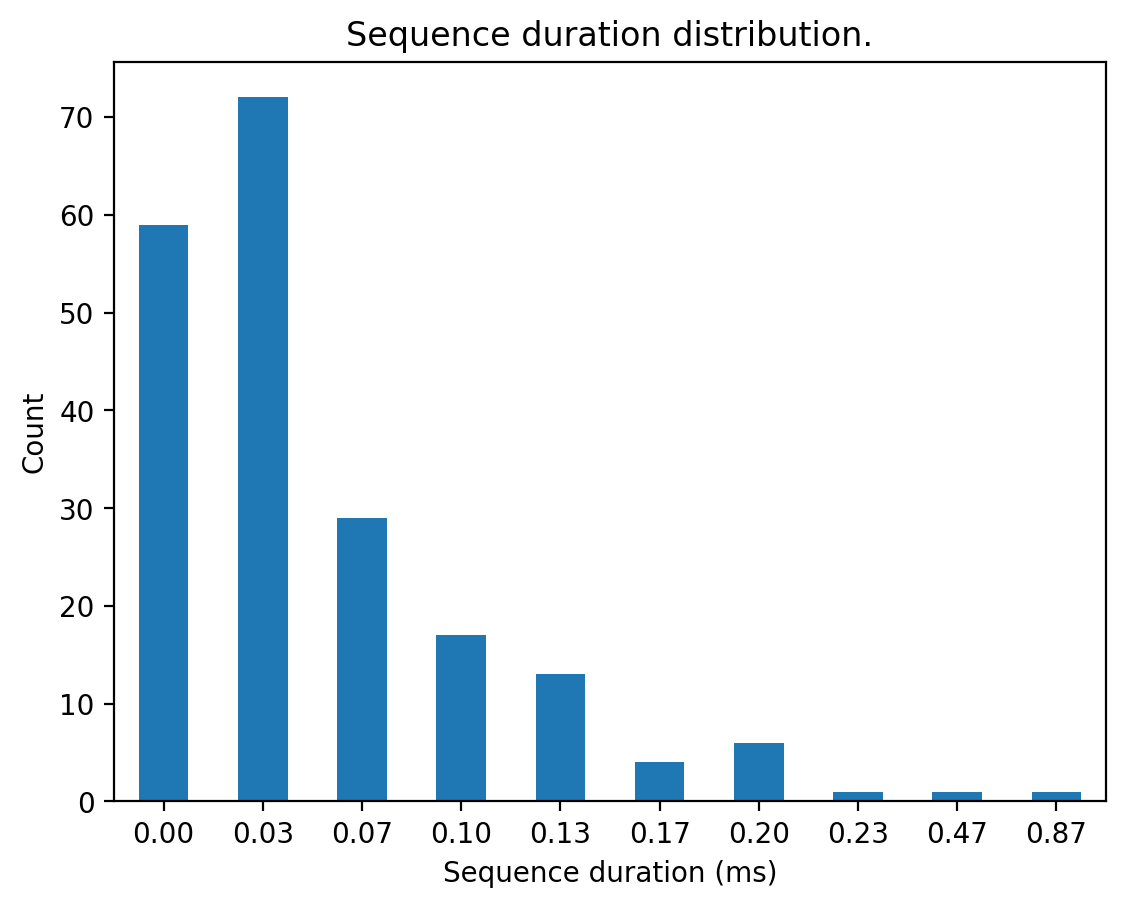

Num. sequences: 203


In [9]:
# Bar plot of sequence duration
index = sorted(durations.keys())
data = [durations[i] for i in index]

df = DataFrame(data=data, index=[f"{dur:.2f}" for dur in index])
df.plot.bar(rot=0, legend=False)
plt.title("Sequence duration distribution.")
plt.xlabel("Sequence duration (ms)")
plt.ylabel("Count")
plt.show()
print(f"Num. sequences: {sum(data)}")

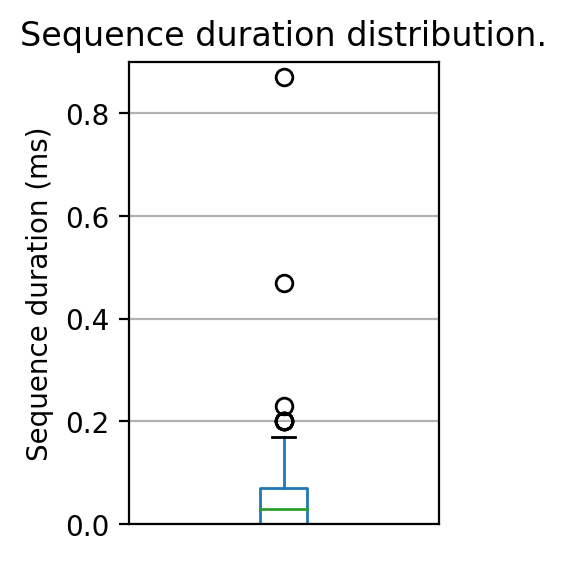

In [11]:
# Box plot of sequence duration
data = []
for dur, num in durations.items():
    data += [dur] * num
df = DataFrame(data=data)
df.boxplot(figsize=(2, 3))
plt.title("Sequence duration distribution.")
plt.xticks([])
plt.ylim(0, 0.9)
plt.ylabel("Sequence duration (ms)")
plt.show()

### Scatter plot
y = max overlap score with a kilosort unit
x = sequence duration

In [12]:
%autoreload 2
from src.comparison import Comparison
from src.sorters.kilosort import Kilosort

In [13]:
kilosort = Kilosort(utils.PATH_SM4_SI, "first", recording)

Getting spike times
Getting match counts and agreement scores


100%|██████████| 182/182 [00:38<00:00,  4.69it/s]


Matches/Num Kilosort2: 17/339


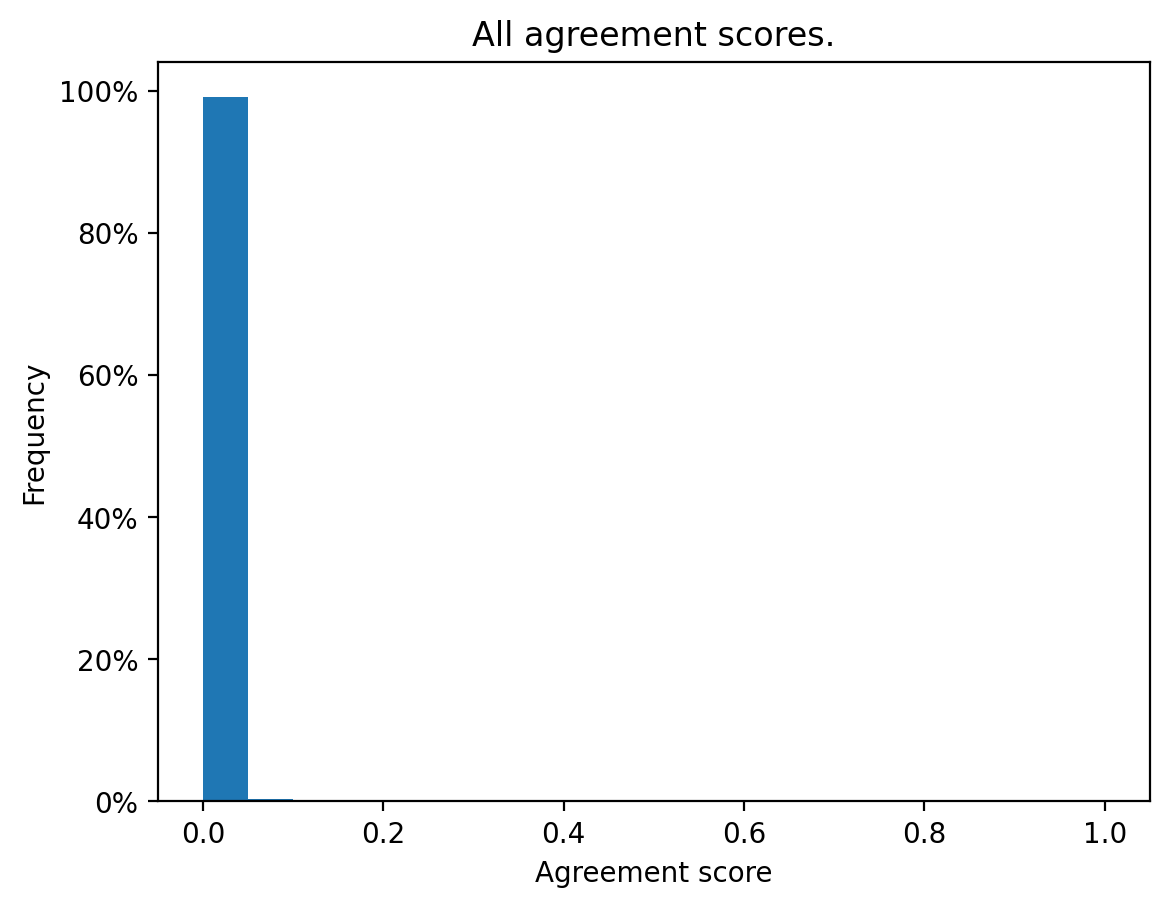

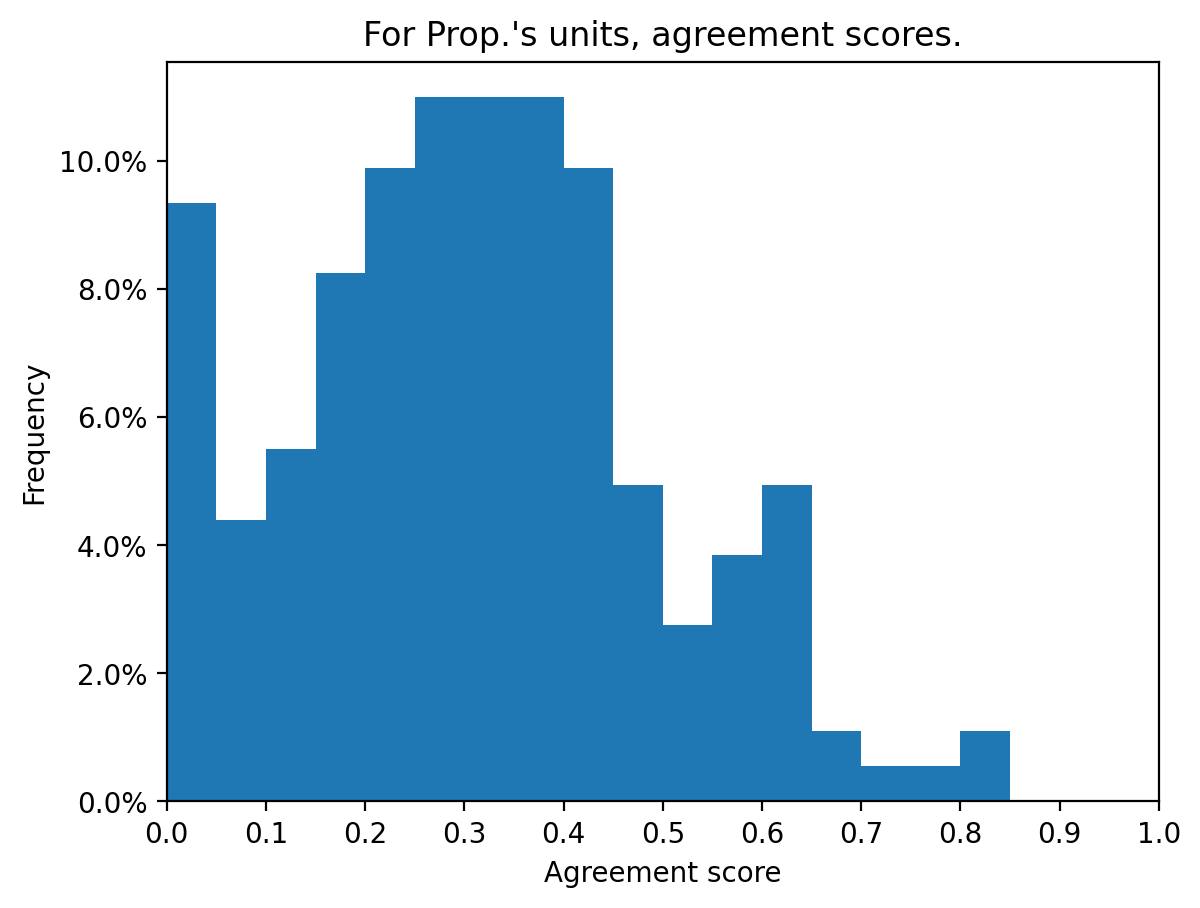

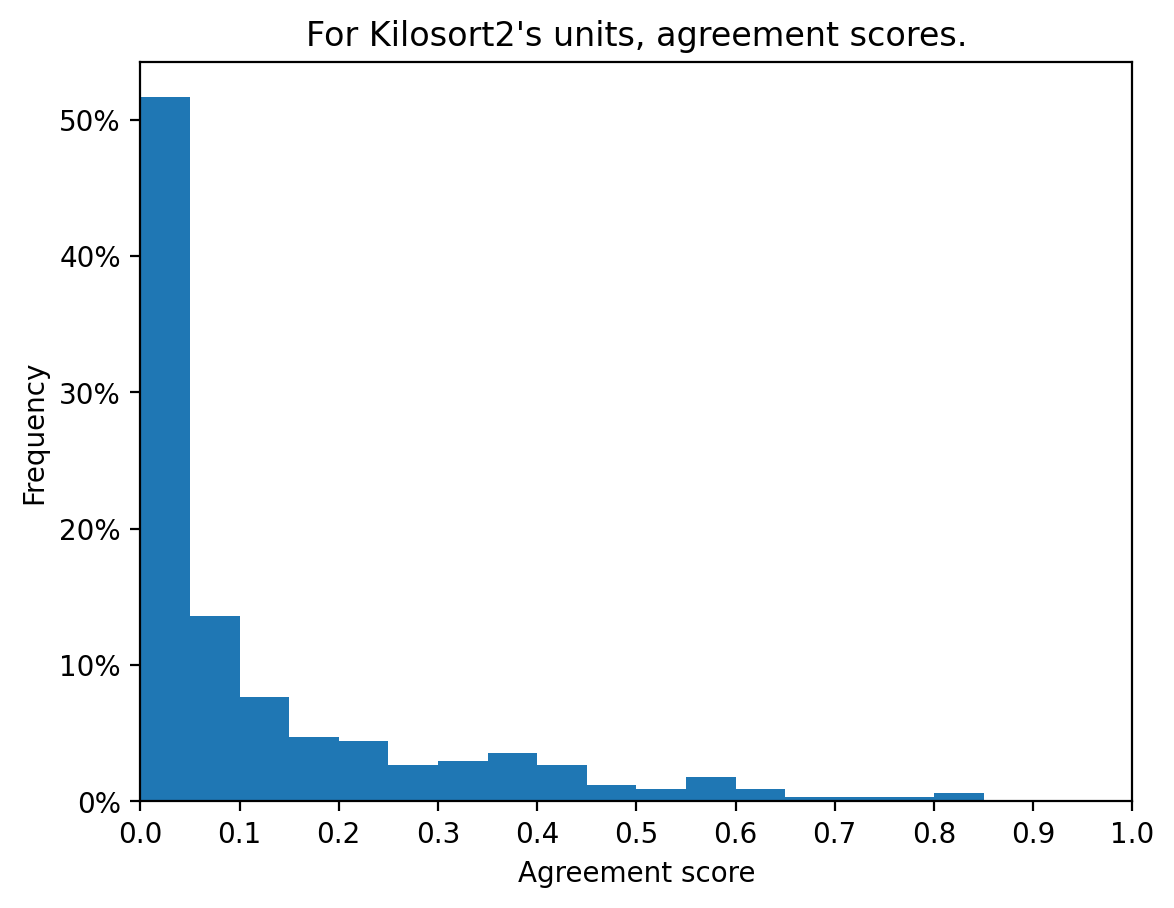

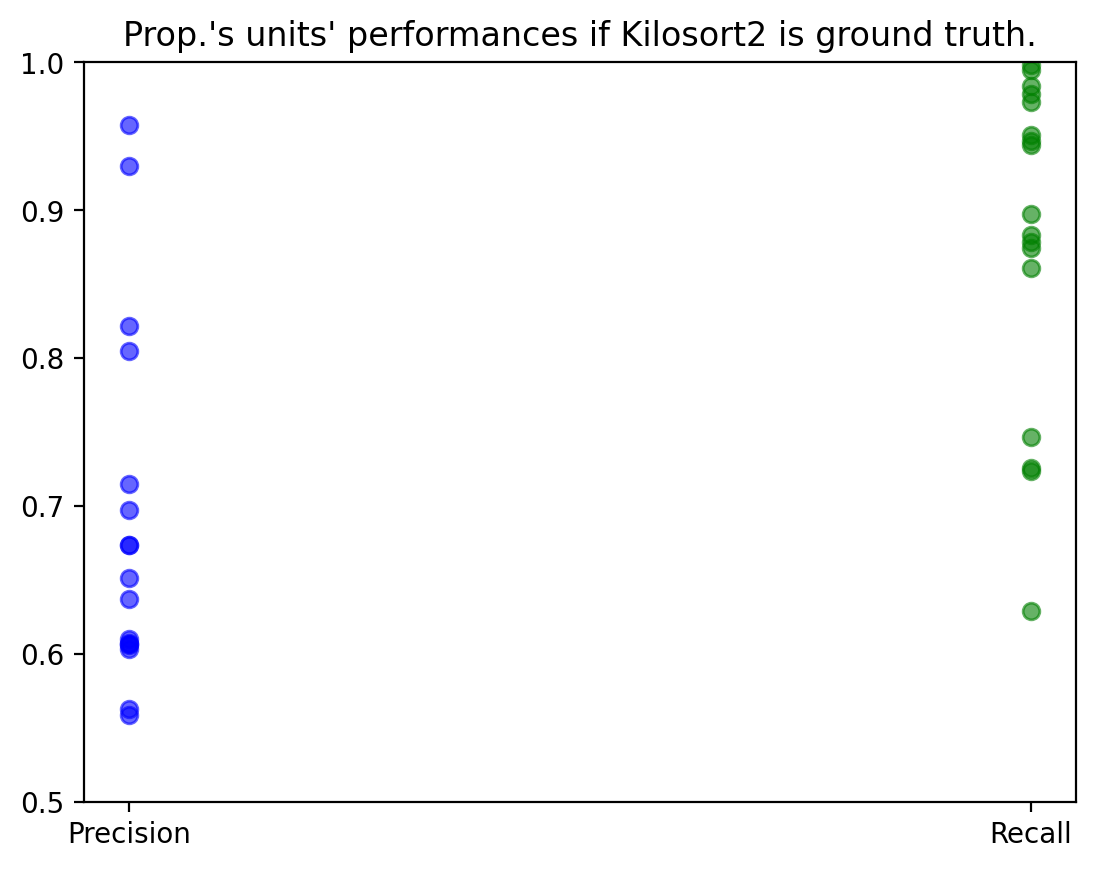

Getting spike times
Getting match counts and agreement scores


100%|██████████| 182/182 [00:38<00:00,  4.74it/s]


Matches/Num Kilosort2: 33/339


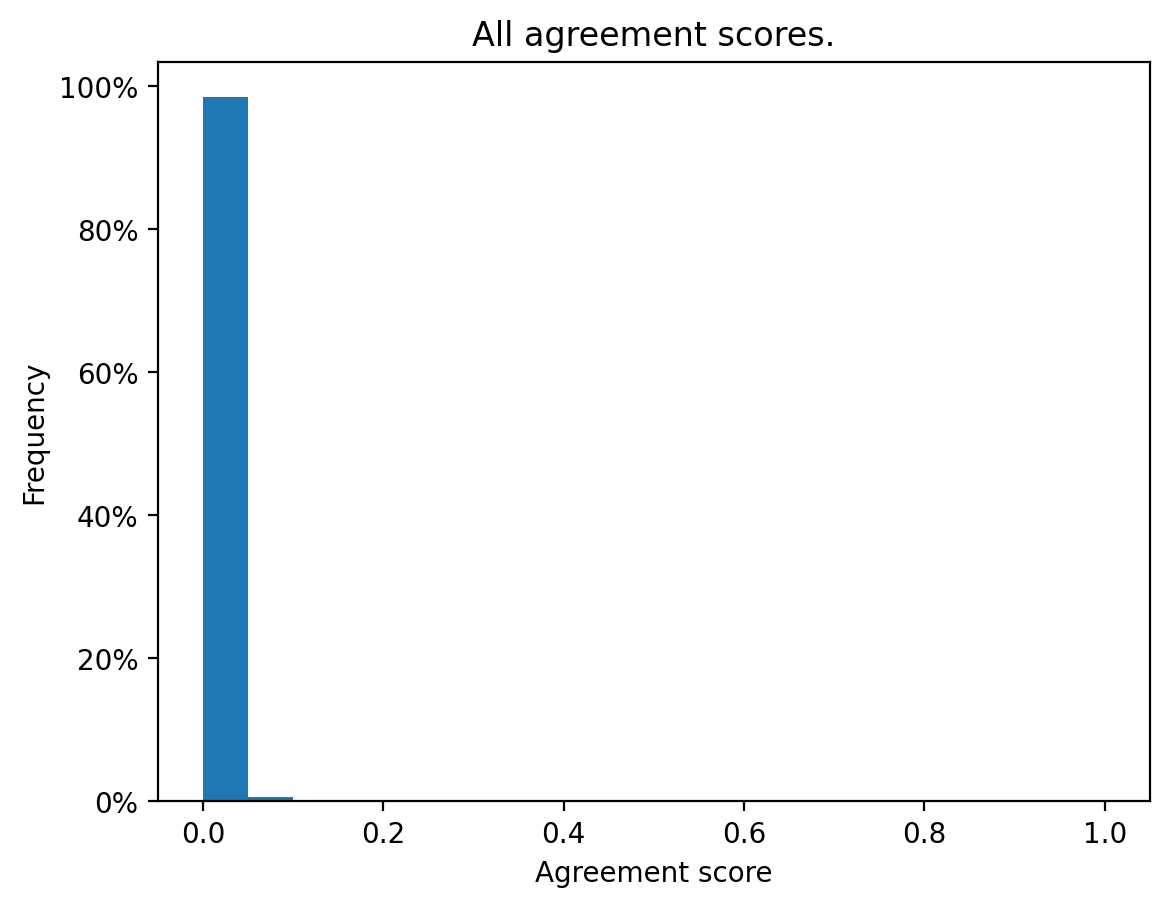

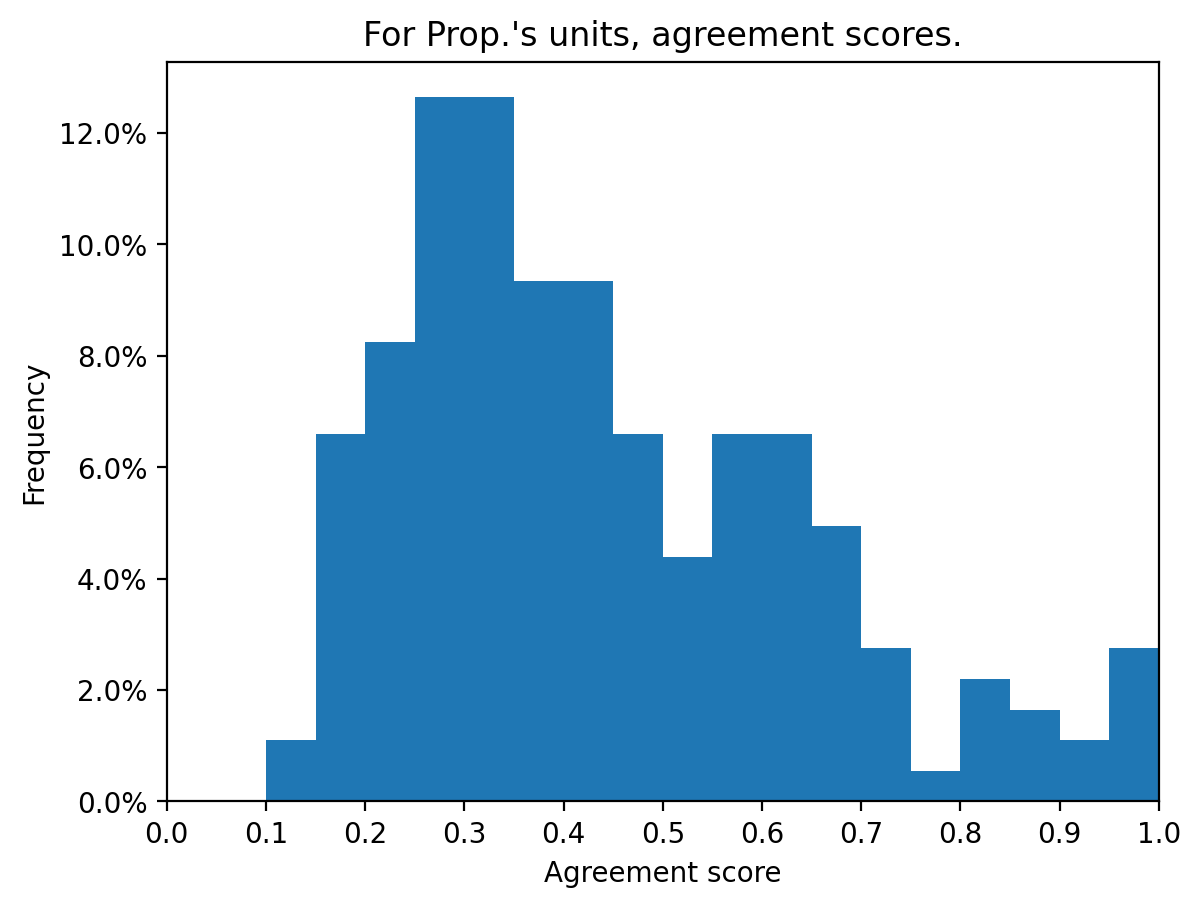

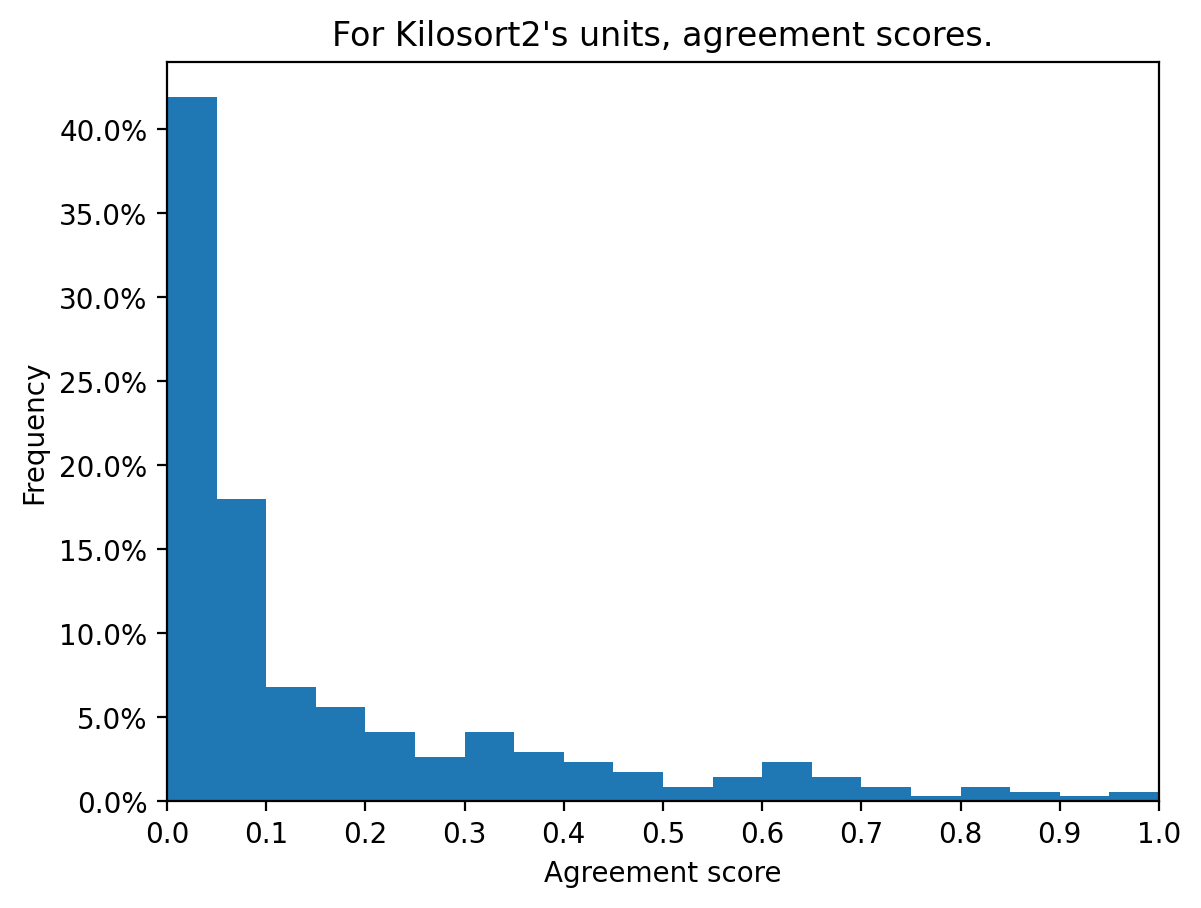

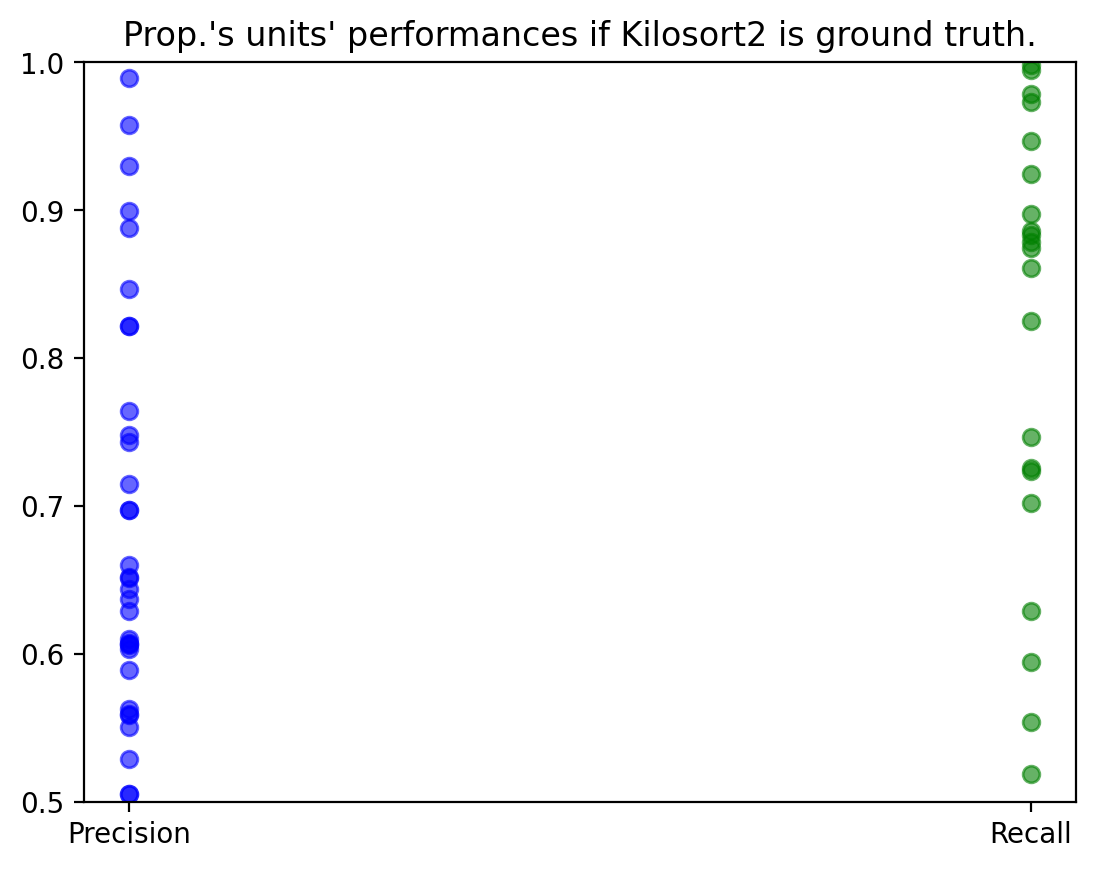

Getting spike times
Getting match counts and agreement scores


100%|██████████| 182/182 [00:40<00:00,  4.47it/s]


Matches/Num Kilosort2: 118/339


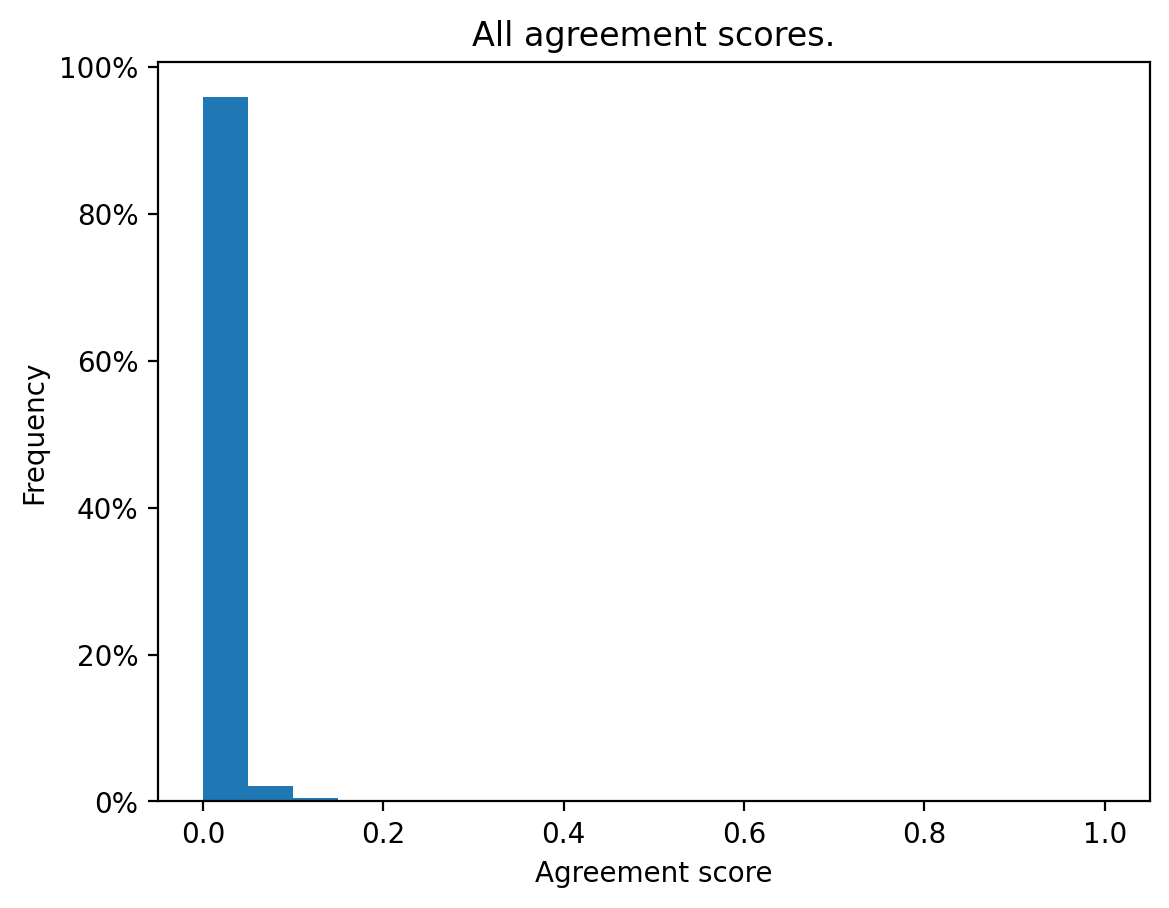

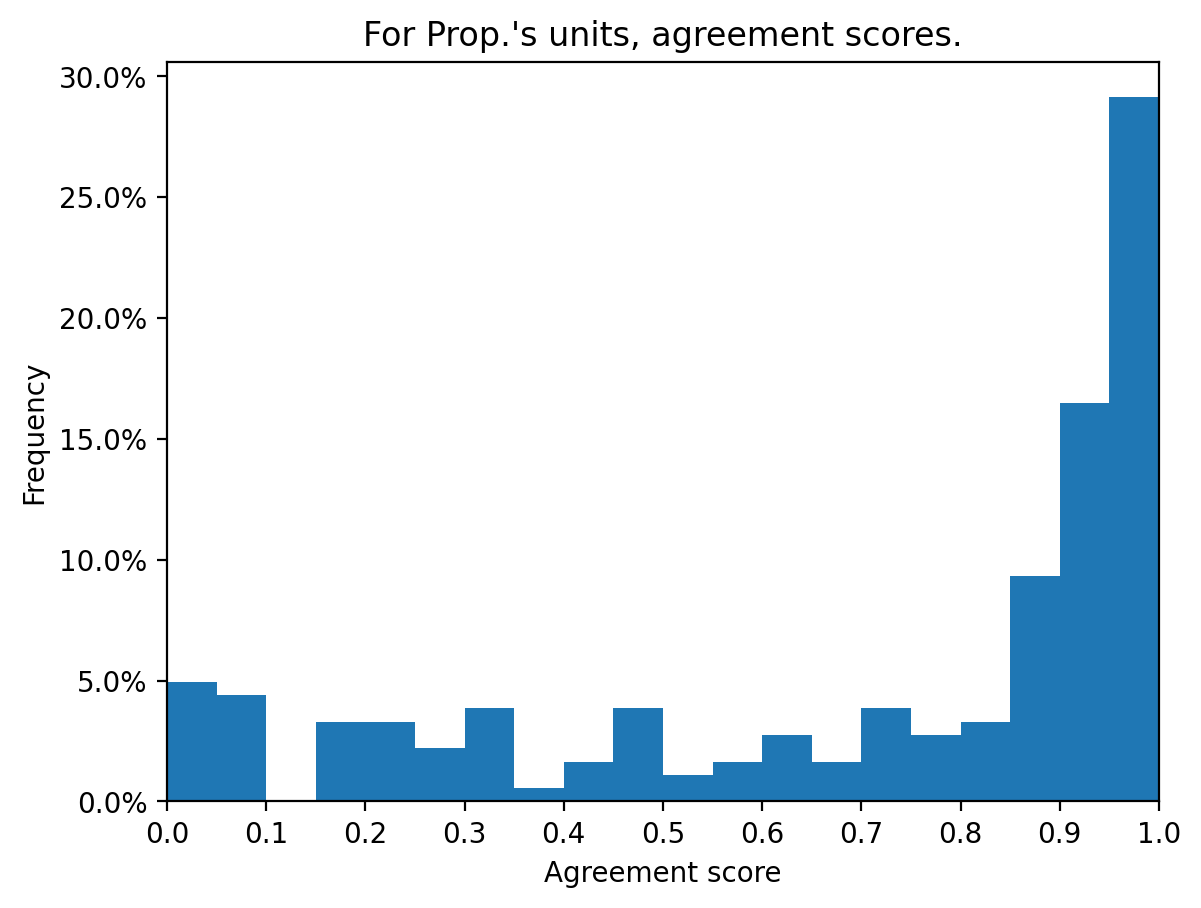

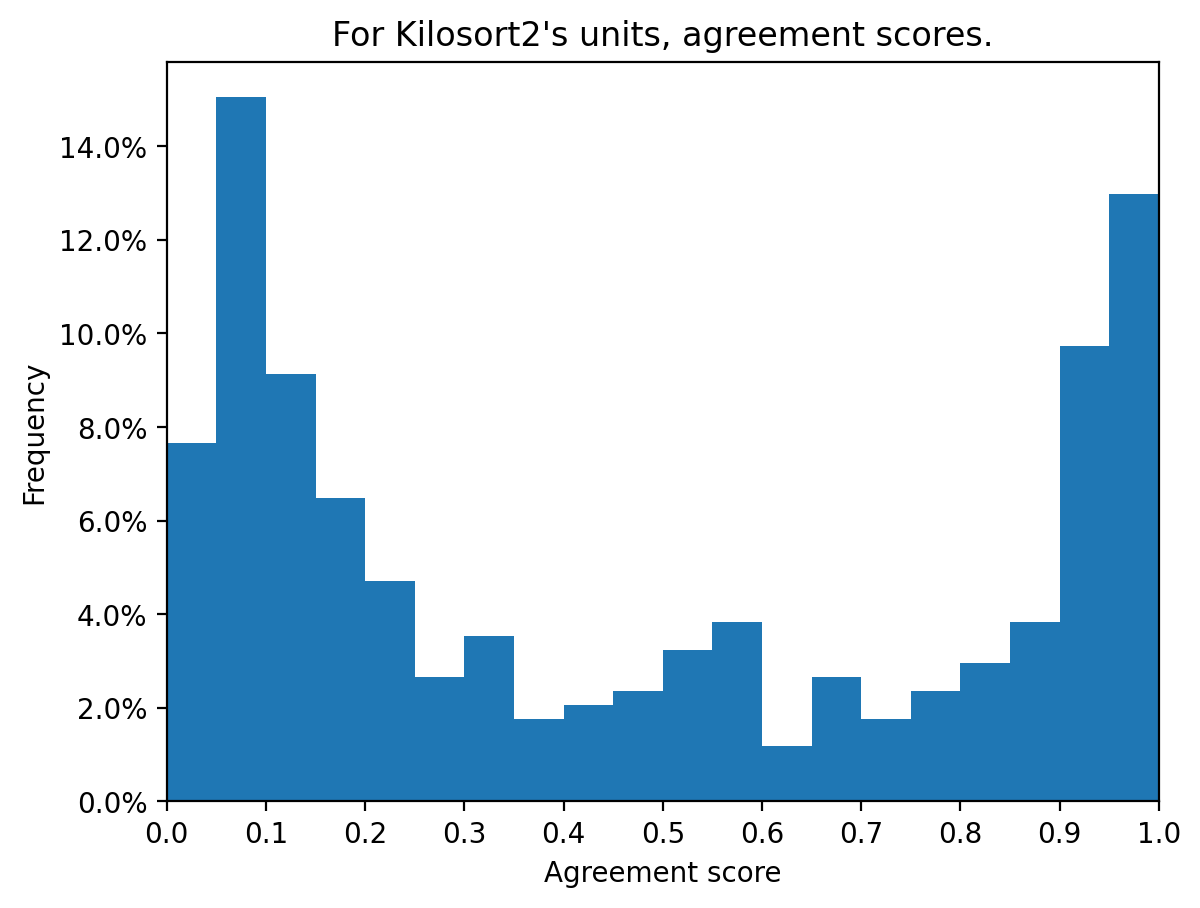

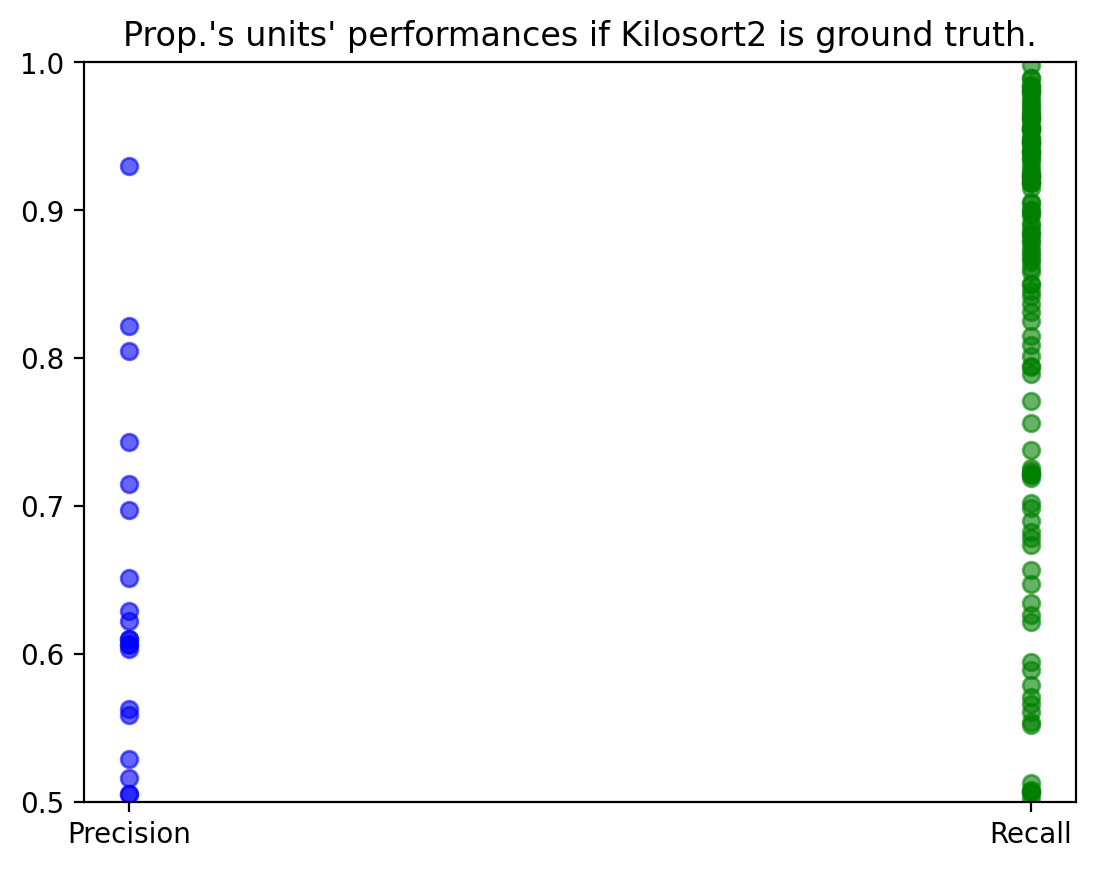

In [14]:
comp12 = Comparison(prop_signal, kilosort, score_formula=1.5)
comp1 = Comparison(prop_signal, kilosort, score_formula=1)
comp2 = Comparison(prop_signal, kilosort, score_formula=2)

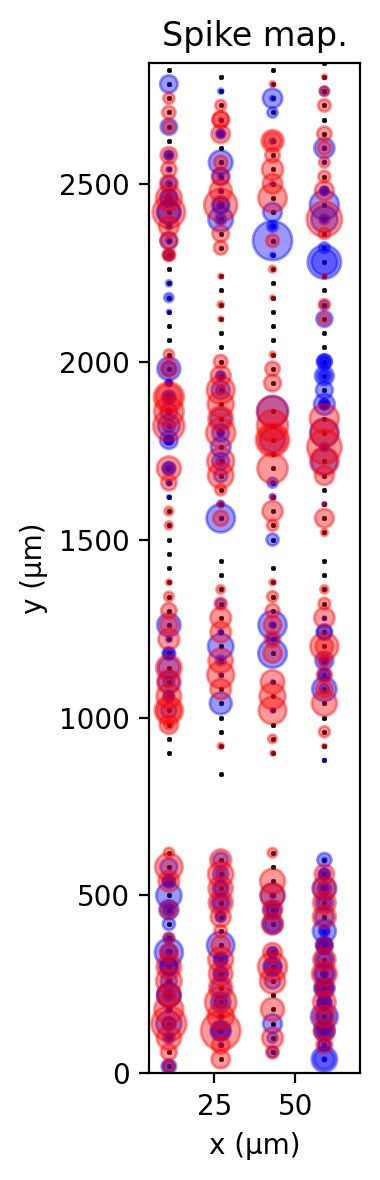

In [15]:
set_dpi(200)
comp12.plot_spike_map(spike_alpha=0.4, size_scale=200, xlim=(5, 70), ylim=None, figsize=(2, 6))

Score formula: 1.5


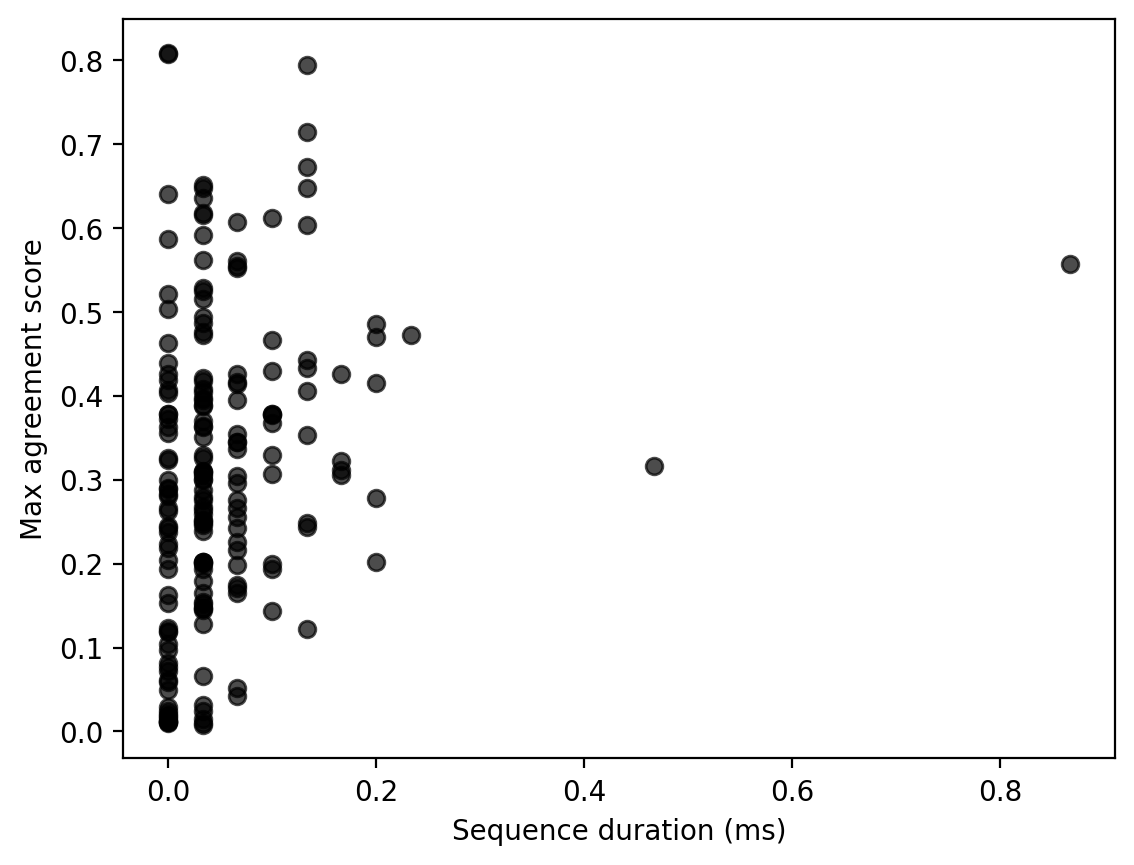

Score formula: 1


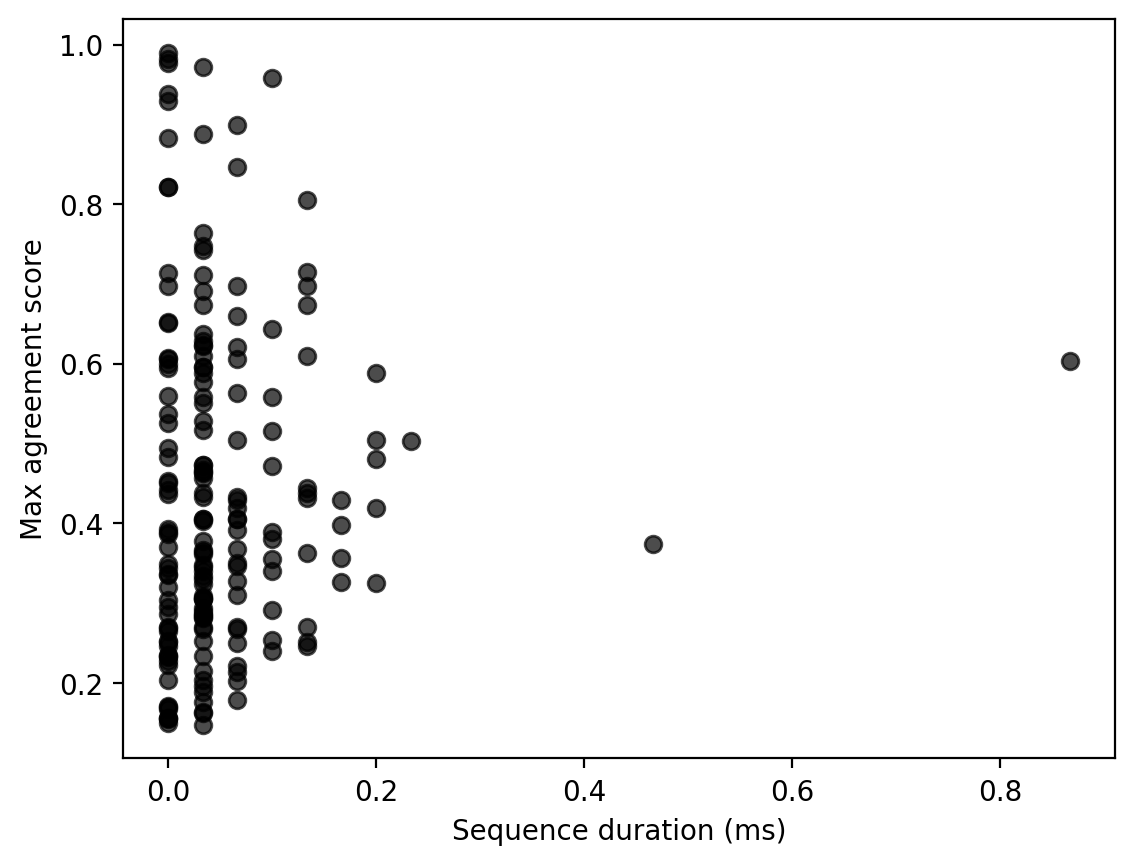

Score formula: 2


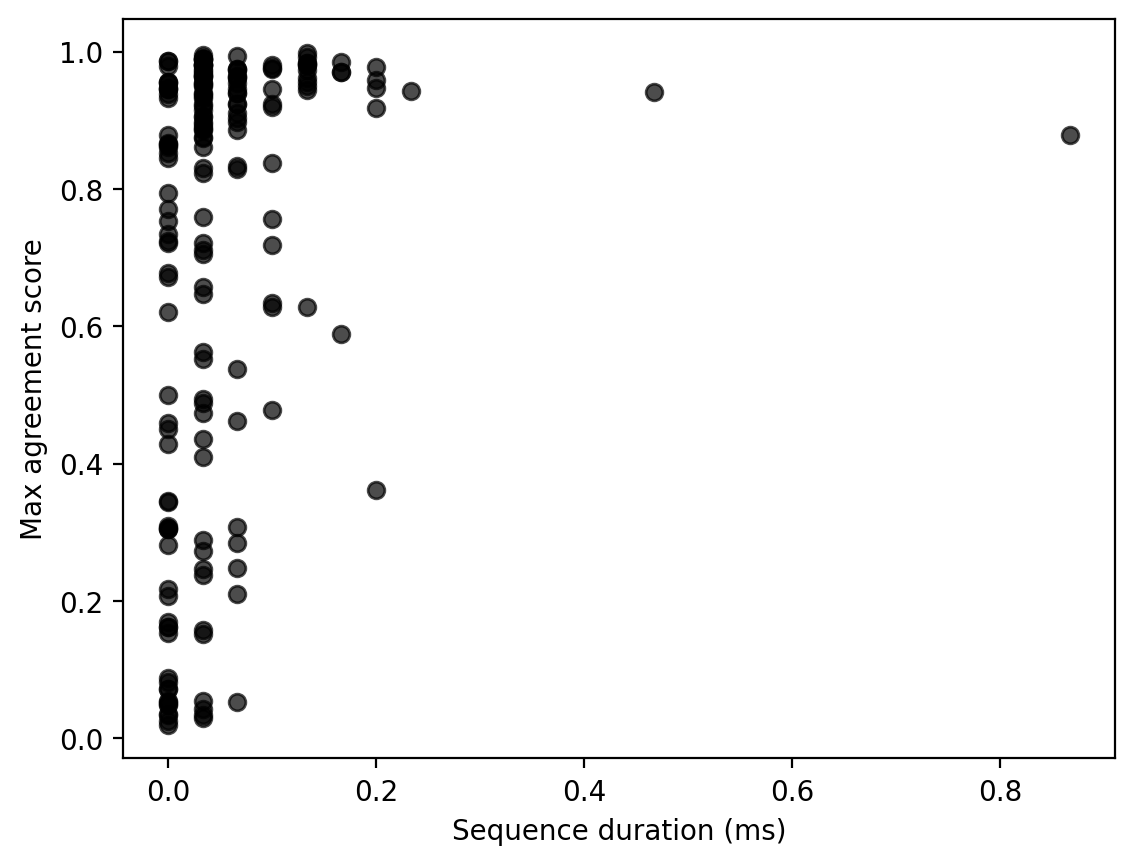

In [16]:
durations = []
for prop_m in prop_signal.props:
    durations.append(max([prop_signal.get_sequence_duration(prop) for prop in prop_m]))
for comp in (comp12, comp1, comp2):
    print(f"Score formula: {comp.score_formula}")
    scores, _ = comp.get_max_agreement_scores()
    for s, d in zip(scores, durations):
        plt.scatter(d, s, c="black", alpha=0.7)
    plt.xlabel("Sequence duration (ms)")
    plt.ylabel("Max agreement score")
    plt.show()